In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print("training data shape:", x_train.shape)
print("training label shape:", y_train.shape)
print("test data shape:", x_test.shape)
print("test label shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
training data shape: (60000, 28, 28)
training label shape: (60000,)
test data shape: (10000, 28, 28)
test label shape: (10000,)


In [6]:
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]


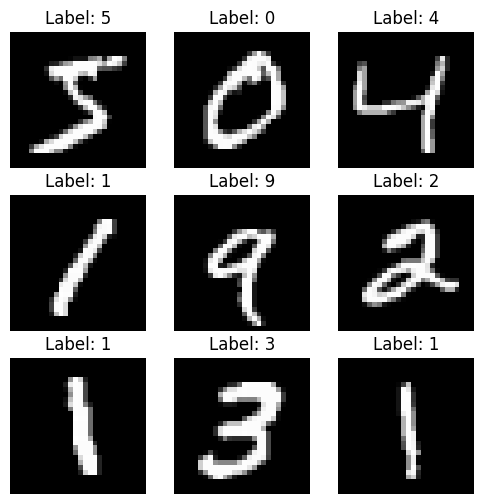

In [10]:
plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [11]:
#normalization

x_train = x_train / 255.0
x_test  = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)


(60000, 28, 28, 1)


In [14]:
#cnn building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        activation='relu',
        input_shape=(28,28,1)
    )
)
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(
    Conv2D(
        filters=64,
        kernel_size=(3,3),
        activation='relu'
    )
)

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9580 - loss: 0.1378 - val_accuracy: 0.9845 - val_loss: 0.0580
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9851 - loss: 0.0457 - val_accuracy: 0.9897 - val_loss: 0.0348
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9902 - val_loss: 0.0336
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9905 - val_loss: 0.0354
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9922 - val_loss: 0.0297


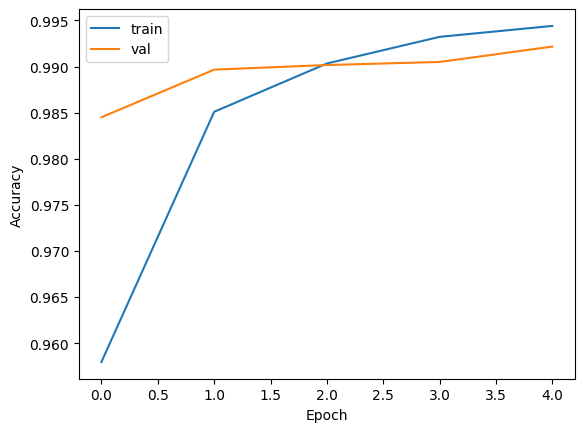

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9903 - loss: 0.0305
Test accuracy: 0.9902999997138977


In [19]:
model.save("mnist_cnn.keras")

C:\Users\pc\mnist_env\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


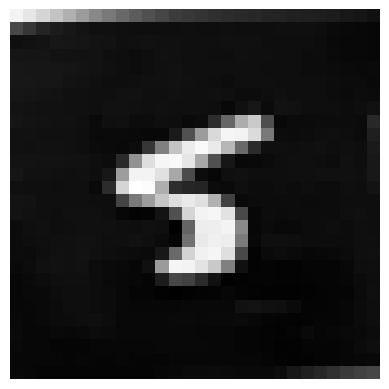

In [20]:
#testing

from tensorflow.keras.models import load_model
model = load_model("mnist_cnn.keras")




import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image
img = Image.open("img1.png").convert('L')  # grayscale
img = img.resize((28, 28))

# Convert to array
img_array = np.array(img)


# Normalize
img_array = img_array / 255.0

# Reshape for CNN
img_array = img_array.reshape(1, 28, 28, 1)

# Show image
plt.imshow(img_array.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()



In [21]:
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted digit: 5


In [22]:
for i, prob in enumerate(prediction[0]):
    print(f"{i}: {prob:.4f}")


0: 0.0000
1: 0.0000
2: 0.0000
3: 0.0536
4: 0.0000
5: 0.9412
6: 0.0000
7: 0.0000
8: 0.0050
9: 0.0001
